<a href="https://colab.research.google.com/github/GusevaYuliya/btk_1/blob/main/btkR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
 if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
  BiocManager::install("karyoploteR")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'karyoploteR'"


In [15]:
library(karyoploteR)

In [16]:
library(repr)

In [17]:
BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'BSgenome.Hsapiens.UCSC.hg38'"


In [18]:
library(BSgenome.Hsapiens.UCSC.hg38)

In [19]:
bsg <- BSgenome.Hsapiens.UCSC.hg38

In [20]:
hp <- data.frame(read.table('/content/test.out', sep = ",")) #данные сгенерированные в btk.py

In [21]:
data <- data.frame('chromosome' = c(), 'color' = c(), 'start' = c())
d <- data.frame('chromosome' = c(), 'color' = c())
for (i in c(1:22)){
  d <- data.frame('color' = hp[i, ][hp[i, ] != 0])
  d$chromosome <- paste0('chr', i)
  d$start <- sample(1:data.frame(seqlengths(bsg))[1:22, ][i], nrow(d))
  data <- rbind(data, d)}

In [80]:
dd <- data[data$chromosome == 'chr1', ]
n <- lapply(c(1:nrow(dd)), function(x) dd$color[which.min(abs(dd$start[-x] - dd$start[x]))] == dd$color[x])

In [83]:
dd$start

[1]  14529207  46752869  33466131  68785892  74331851 197118228 177136959
[8] 203193664 226930214

In [93]:
which.min(c(dd$start - dd$start[1])[c(dd$start - dd$start[1]) != 0])

[1] 2

In [89]:
which.min(dd$start - dd$start[1])

[1] 1

In [81]:
n

[[1]]
[1] FALSE

[[2]]
[1] TRUE

[[3]]
[1] FALSE

[[4]]
[1] TRUE

[[5]]
[1] FALSE

[[6]]
[1] FALSE

[[7]]
[1] FALSE

[[8]]
[1] FALSE

[[9]]
[1] TRUE

In [107]:
data

color,chromosome,start
<dbl>,<chr>,<int>
10,chr1,14529207
12,chr1,46752869
29,chr1,33466131
26,chr1,68785892
29,chr1,74331851
28,chr1,197118228
21,chr1,177136959
3,chr1,203193664
3,chr1,226930214


In [118]:
data_near <- data.frame('chromosome' = c(), 'color' = c(), 'start' = c())
end <- c()
for (i in unique(data$chromosome)){
  dd <- data[data$chromosome == i, ]
  for (j in c(1:nrow(dd))){
    diff <- abs(dd$start - dd$start[j])
    diff[diff == 0] <- 1e20
    n <- which.min(diff)
    if (dd$color[n] == dd$color[j]){
      data_near <- rbind(data_near, dd[j, ])
      data_near <- rbind(data_near, dd[n, ])
      end <- c(end, min(dd$start[j], dd$start[n]))
      end <- c(end, min(dd$start[j], dd$start[n]))
    }
  }
}

In [119]:
data_near$end <- end
data_near <- unique(data_near)

In [120]:
data_near

,color,chromosome,start,end
,<dbl>,<chr>,<int>,<int>
9,3,chr1,226930214,203193664
8,3,chr1,203193664,203193664
64,12,chr7,124757904,124757904
65,12,chr7,129243754,124757904
106,2,chr12,83798442,76597928
109,2,chr12,76597928,76597928
155,33,chr17,67436272,63883382
157,33,chr17,63883382,63883382
186,32,chr20,32418641,30262140


In [22]:
install.packages("ggsci")
library(ggsci)

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)



In [28]:
library(scales)

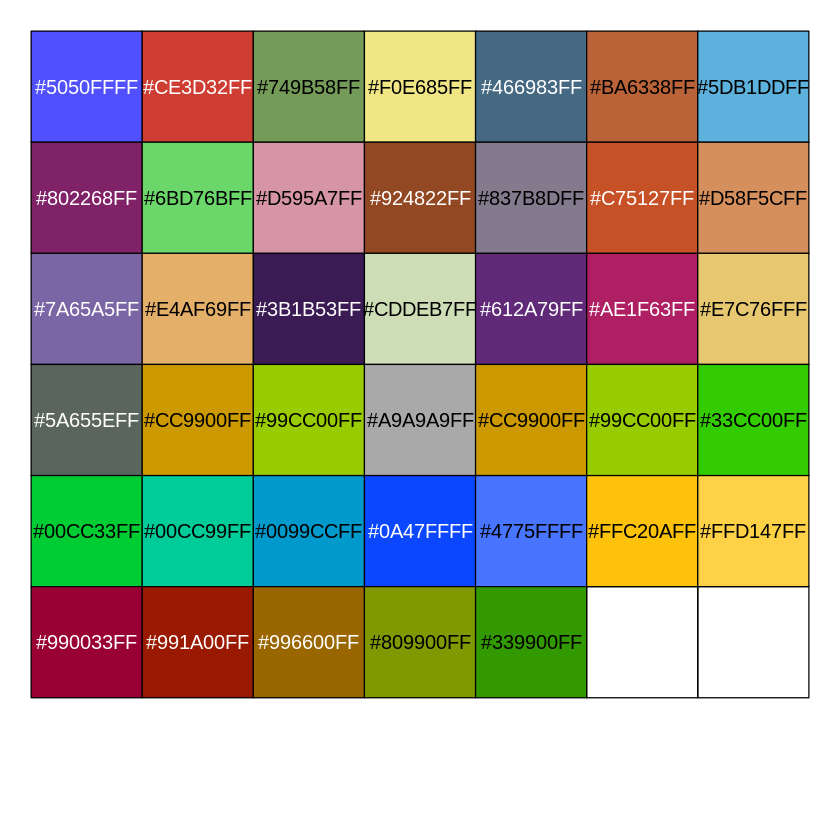

In [37]:
show_col(pal_igv()(40))

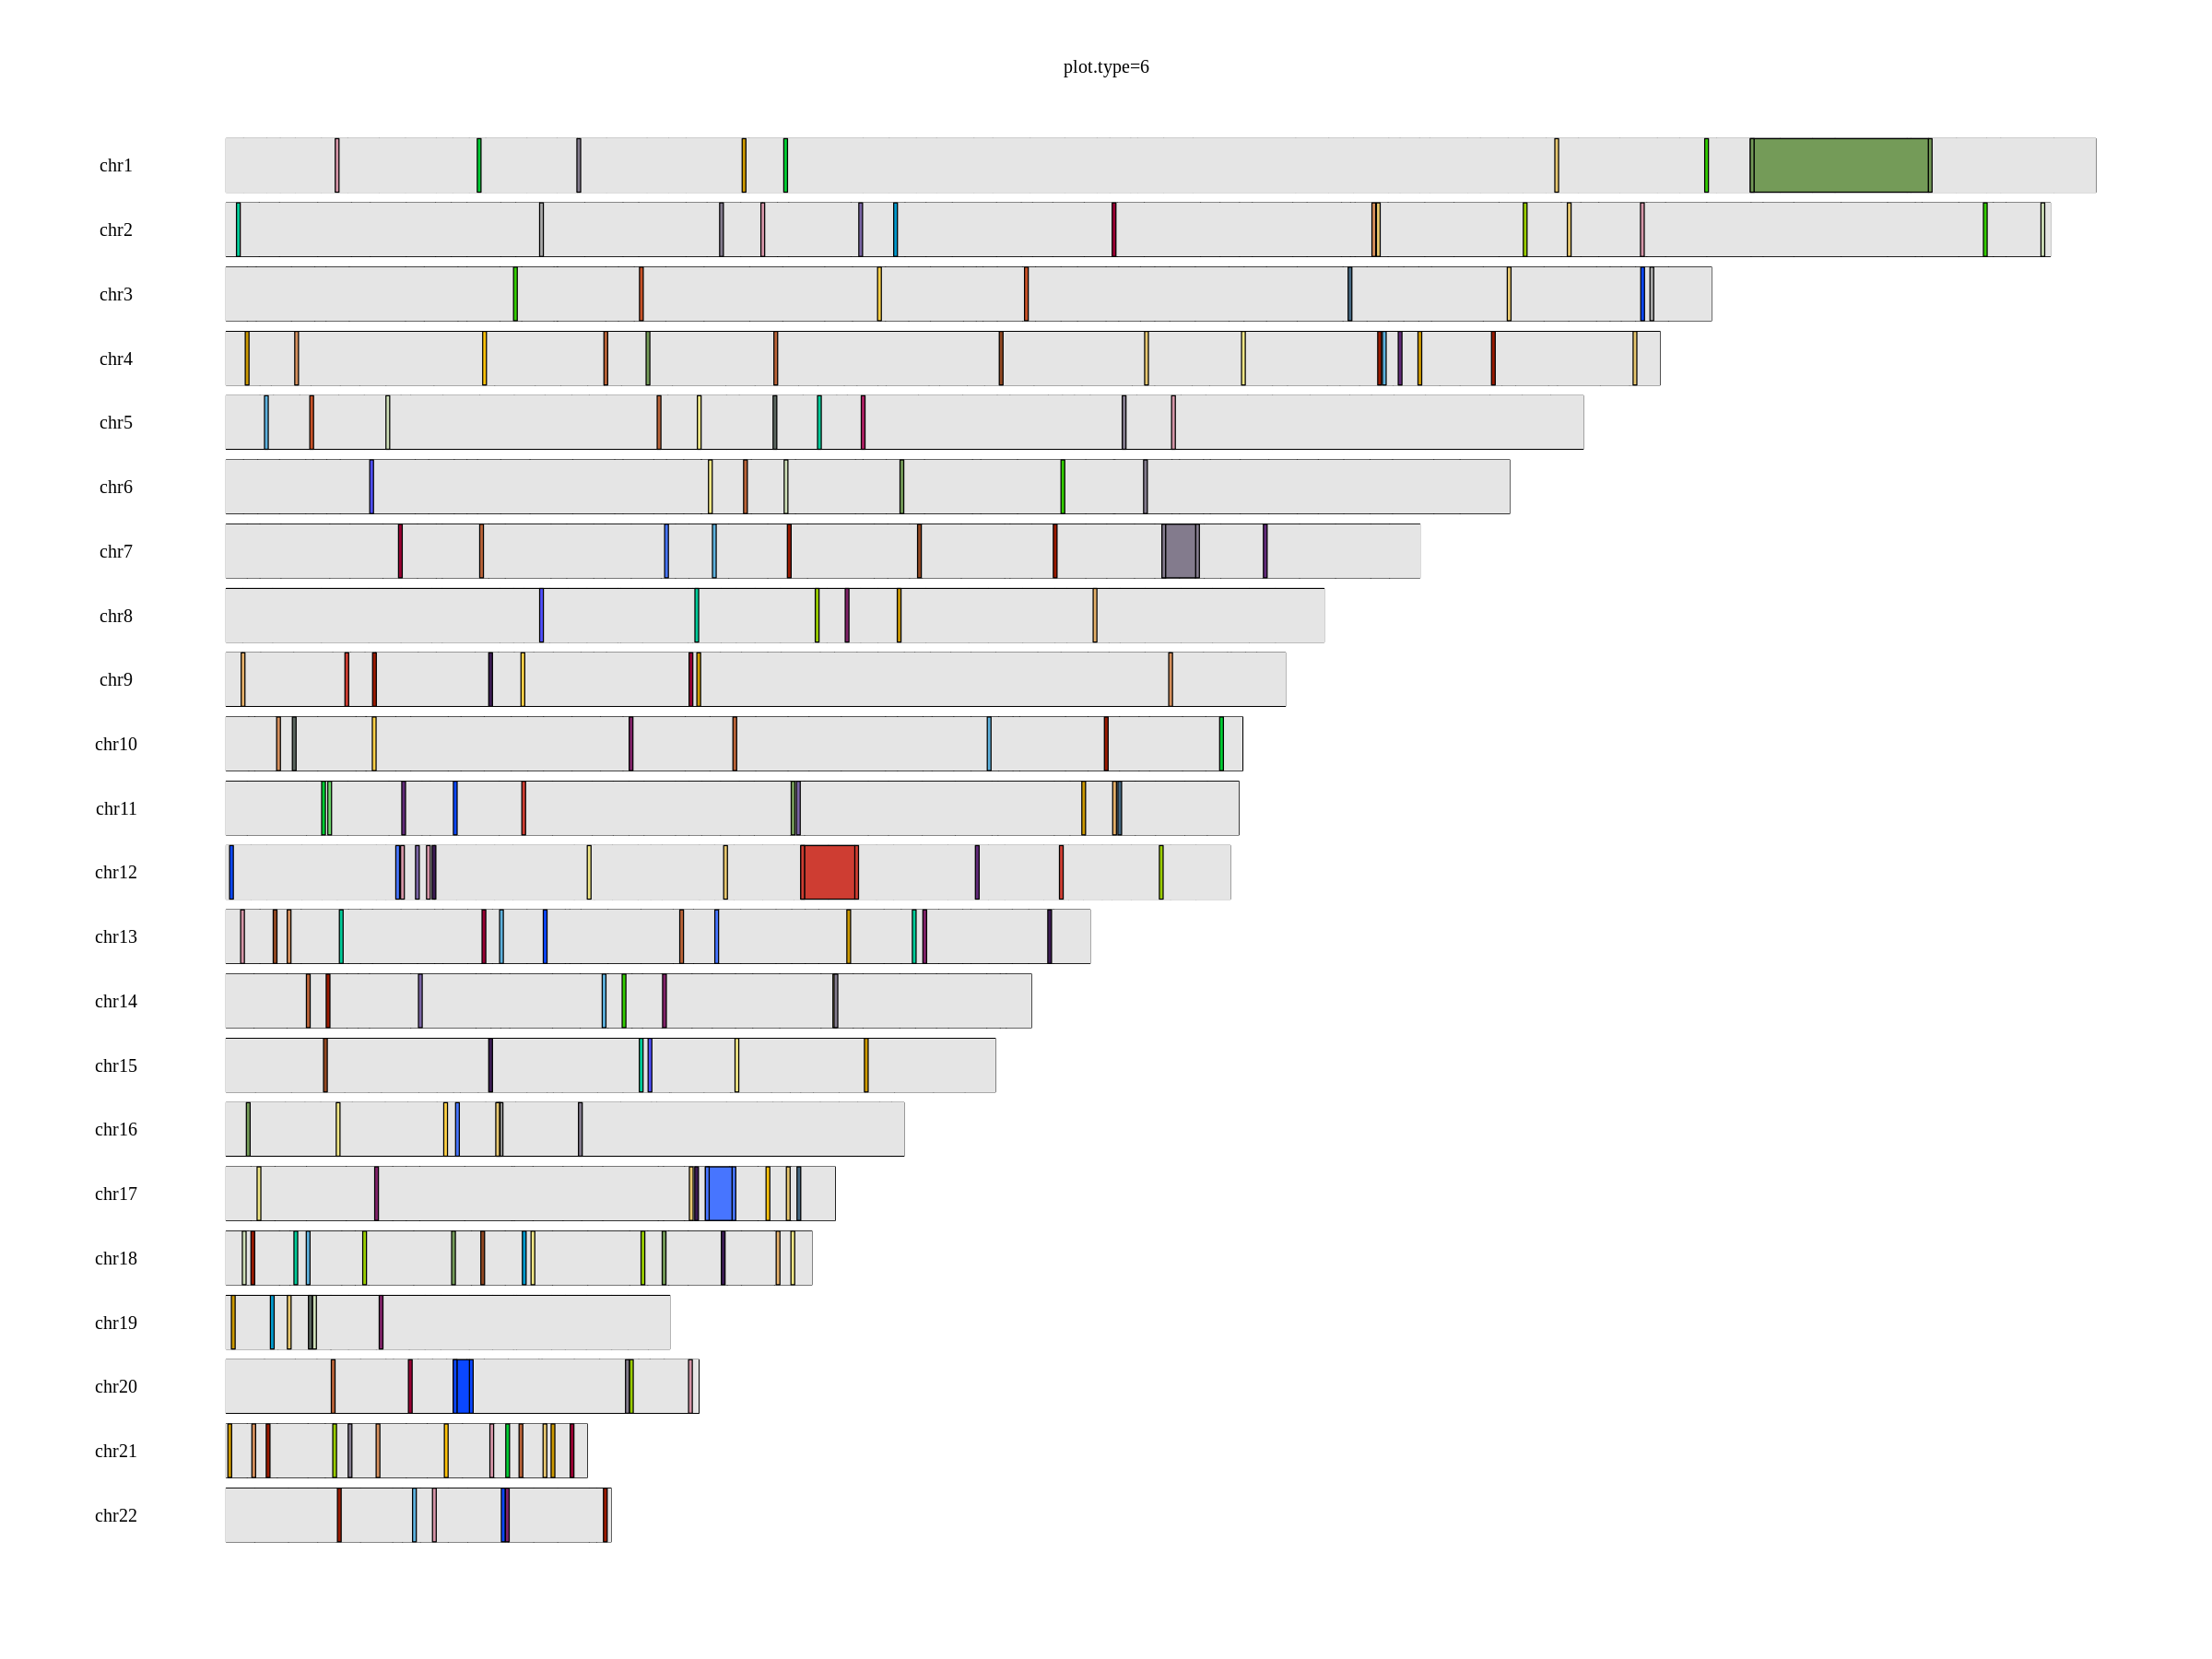

In [123]:
options(repr.plot.width=20, repr.plot.height=15)

par(family = "Times")
kp <- plotKaryotype(plot.type=6, main="plot.type=6", chromosomes = c("autosomal"))
kpDataBackground(kp)
kpRect(kp, chr=data$chromosome, x0=data$start, x1=data$start+0.5e6, y0=0, y1 = 1, col=pal_igv()(40)[data$color], data.panel = "ideogram")
kpRect(kp, chr=data_near$chromosome, x0=data_near$start, x1=data_near$end+0.5e6, y0=0, y1 = 1, col=pal_igv()(40)[data_near$color], data.panel = "ideogram")